## Text Classifer based on Markov Models

The motivation behind a Markov Model is modeling the probability of a sequence, in our case, a sentence. 

Markov Property is a restrictive assumption on the dependency structure of a joint distribution. It says that $X_{t}$ is only dependent on $X_{t-1}$

<div>
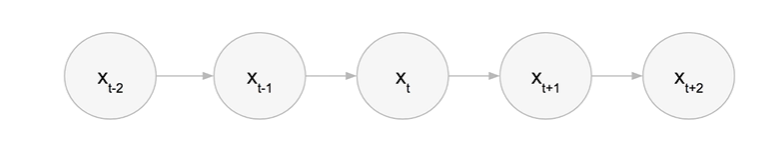
</div>

When you think of the probability of a sequence, assuming the Markov property holds (even when it does not), helps us simplify the math. For example: 

<div>
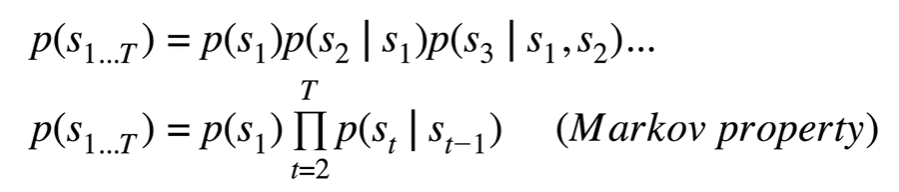
</div>

The Markov Model is used to model sequences of categorical values or states. In a Markov Model, states s(t) = state at time t. To model a text as a Markov Process, you need two things: 
- A vector $\pi_i$ that contains the probability that a sequence starts with a word for all possible words $p(s_1)$
- A matrix $A_{ij}$ that contains all the probabilities of transitioning from one word to the next, p($s_t$ = j | $s_{t-1}$ = i), i = 1...M and j = 1...M

Here's how you estimate $\pi_i$ and $A_{ij}$:

<div>
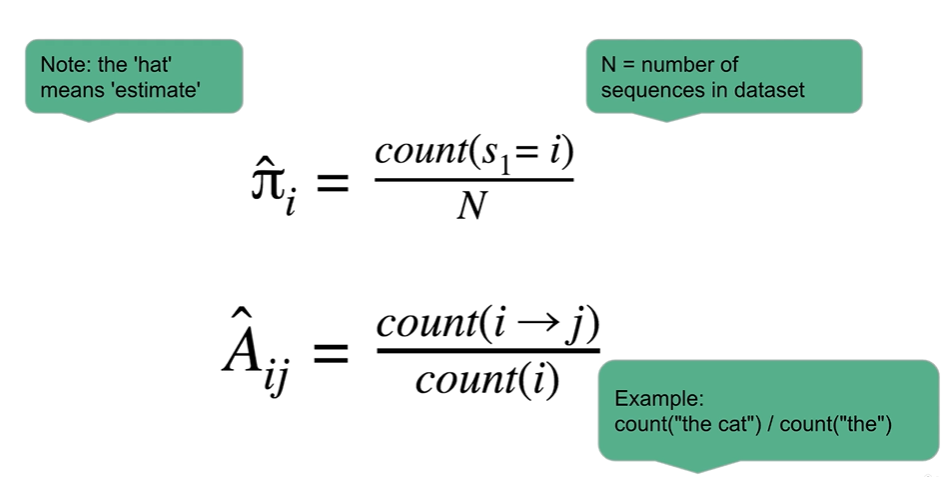
</div>

## Predicting the author based on the poem

Steps: 
1. Read files and split into train-test. 
2. Create a dictionary of unique words and map them to integers. For e.g., {'but':1, 'why':2..}
3. Convert training text into a sequence of integers
4. Calculate $\pi_i$ and $A_{ij}$ for each author. This gives us p(poem|author). 
5. Calculate priors, i.e., p(author = k). 
6. You have everything you need to make a prediction.

<div>
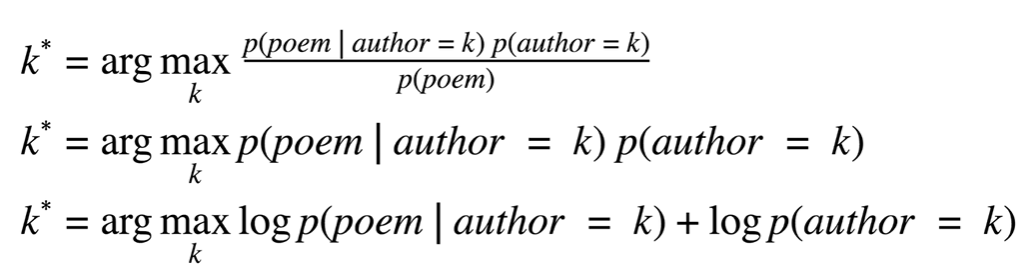
</div>

In [132]:
import numpy as np
import string

In [154]:
input_files = [
  'edgar_allan_poe.txt',
  'robert_frost.txt',
]

In [162]:
input_texts = []
labels = []

for label, f in enumerate(input_files):
    print(f"{f} corresponds to label {label}")
    for line in open(f,encoding='utf-8'):
        line = line.rstrip().lower()
        if line:
            line = line.translate(str.maketrans('', '', string.punctuation))
            input_texts.append(line)
            labels.append(label)
input_texts

edgar_allan_poe.txt corresponds to label 0
robert_frost.txt corresponds to label 1


['lo death hath reard himself a throne',
 'in a strange city all alone',
 'far down within the dim west',
 'where the good and the bad and the worst and the best',
 'have gone to their eternal rest',
 'there shrines and palaces and towers',
 'are not like any thing of ours',
 'oh no o no ours never loom',
 'to heaven with that ungodly gloom',
 'timeeaten towers that tremble not',
 'resemble nothing that is ours',
 'around by lifting winds forgot',
 'resignedly beneath the sky',
 'the melancholy waters lie',
 'no holy rays from heaven come down',
 'on the long nighttime of that town',
 'but light from out the lurid sea',
 'streams up the turrets silently',
 'up thrones up longforgotten bowers',
 'of sculturd ivy and stone flowers',
 'up domes up spires up kingly halls',
 'up fanes up babylonlike walls',
 'up many a melancholy shrine',
 'whose entablatures intertwine',
 'the mask the viol and the vine',
 'there open temples open graves',
 'are on a level with the waves',
 'but not the ri

In [428]:
#Test-train split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_texts, labels, test_size=0.33, random_state=112)

In [429]:
#Create unique word-integer mapping
mapping = {}
mapping['unknown'] = 0
unique_words = 1
for i in X_train:
    for j in i.split():
        if j not in mapping:
            mapping[j] = unique_words
            unique_words += 1
mapping

{'unknown': 0,
 'who': 1,
 'wants': 2,
 'to': 3,
 'hear': 4,
 'your': 5,
 'news': 6,
 'you': 7,
 'dreadful': 8,
 'fool': 9,
 'was': 10,
 'the': 11,
 'fair': 12,
 'palace': 13,
 'door': 14,
 'nor': 15,
 'need': 16,
 'mind': 17,
 'serial': 18,
 'ordeal': 19,
 'its': 20,
 'hands': 21,
 'of': 22,
 'gold': 23,
 'in': 24,
 'greenest': 25,
 'our': 26,
 'valleys': 27,
 'and': 28,
 'better': 29,
 'defeat': 30,
 'almost': 31,
 'their': 32,
 'sulphurous': 33,
 'currents': 34,
 'down': 35,
 'yaanek': 36,
 'no': 37,
 'more': 38,
 'so': 39,
 'than': 40,
 'became': 41,
 'a': 42,
 'man—': 43,
 'isnt': 44,
 'it': 45,
 'hell': 46,
 'he': 47,
 'said': 48,
 'i': 49,
 'want': 50,
 'know': 51,
 'give': 52,
 'headshake': 53,
 'she': 54,
 'replied': 55,
 'ulalume': 56,
 'stood': 57,
 'over': 58,
 'me': 59,
 'resurrected': 60,
 'tree': 61,
 'each': 62,
 'hour': 63,
 'before': 64,
 'us': 65,
 'but': 66,
 'then': 67,
 'only': 68,
 'bid': 69,
 'back': 70,
 'time': 71,
 'made': 72,
 'simple': 73,
 'by': 74,
 'loss

In [442]:
#Convert each line of text into integer lists

train_int_text = []
for i in X_train:
    int_line = []
    for j in i.split():
        int_line.append(mapping[j])
    train_int_text.append(int_line)

test_int_text = []
for i in X_test:
    int_line = []
    for j in i.split():
        int_line.append(mapping.get(j,0))
    test_int_text.append(int_line)
    
train_int_text

[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 7, 17, 11, 18, 19],
 [20, 21, 22, 23],
 [24, 11, 25, 22, 26, 27],
 [28, 29, 30, 31],
 [32, 33, 34, 35, 36],
 [37, 38, 39, 40, 41, 42, 43],
 [44, 45, 46, 47, 48, 49, 50, 3, 51],
 [52, 42, 53],
 [54, 55, 56, 56],
 [57, 58, 59, 42, 60, 61],
 [62, 63, 64, 65, 66, 67, 68, 69],
 [70, 24, 42, 71, 72, 73, 74, 11, 75],
 [49, 76, 77, 42, 78, 79, 80, 81],
 [82, 32, 83],
 [11, 84, 28, 85],
 [86, 87, 24, 11, 88, 89],
 [90, 91, 22, 92, 93],
 [32, 33, 34, 35, 36],
 [94, 95, 96, 97, 98, 22, 99],
 [100, 3, 101, 102, 103, 104, 42, 105],
 [106, 107, 108, 109, 110, 111, 112, 49, 113, 114],
 [115, 116, 117, 118, 111, 119, 10, 120],
 [49, 121, 122, 123, 28, 24, 11, 124],
 [125, 102, 42, 126, 127, 11, 128],
 [118, 47, 72, 129, 11, 130, 131],
 [86, 11, 132, 133, 116, 134, 28, 135],
 [136, 137, 133, 138, 139],
 [140, 141, 142, 143, 144, 24, 145, 42, 146],
 [147, 147],
 [37, 148, 149, 47, 48],
 [140, 150, 151, 22, 152, 153, 154],
 [155, 156, 157, 10

In [431]:
# initialize A and pi matrices - for both classes
V = len(mapping)

A0 = np.ones((V, V))
pi0 = np.ones(V)

A1 = np.ones((V, V))
pi1 = np.ones(V)

In [432]:
#Calculate counts for pi vectors for both classes 

def compute_pi(int_text, pi):
    for seq in int_text:
        pi[seq[0]] += 1

compute_pi([t for t, y in zip(train_int_text, y_train) if y == 0], pi0)
compute_pi([t for t, y in zip(train_int_text, y_train) if y == 1], pi1)

In [433]:
#Calculate counts for A matrices for both classes 

def compute_A(int_text, A):
    for seq in int_text:
        j = None
        for idx in seq:
            if j != None:
                A[j,idx] += 1
            j = idx

compute_A([t for t, y in zip(train_int_text, y_train) if y == 0], A0)
compute_A([t for t, y in zip(train_int_text, y_train) if y == 1], A1)

In [434]:
#Compute probabilities for both A and pi
pi0 = pi0/pi0.sum()
pi1 = pi1/pi1.sum()

A0 = A0/A0.sum(axis=1,keepdims=True)
A1 = A1/A1.sum(axis=1,keepdims=True)

In [435]:
#Get log of probabilities 
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)

In [436]:
#Compute priors
prior1 = sum(y_train)/len(y_train)
prior0 = 1 - prior1

logp0 = np.log(prior0)
logp1 = np.log(prior1)

In [437]:
#Function to predict the author based on text 
def predict_author(int_text, logp0, logp1, logA0, logpi0, logA1, logpi1):
    y_pred = []
    for seq in int_text:
        prob0 = logp0 + logpi0[seq[0]]
        prob1 = logp1 + logpi1[seq[0]]
        last_idx = None
        for idx, token in enumerate(seq):
            if last_idx != None:
                prob0 += logA0[seq[last_idx],seq[idx]]
                prob1 += logA1[seq[last_idx],seq[idx]]
            last_idx = idx
        if prob0>prob1:
            y_pred.append(0)
        else:
            y_pred.append(1)

    return y_pred

y_pred_test = predict_author(test_int_text, logp0, logp1, logA0, logpi0, logA1, logpi1)

In [438]:
import sklearn.metrics as metrics
metrics.confusion_matrix(y_test,y_pred_test)

array([[118, 109],
       [ 13, 471]], dtype=int64)

In [439]:
metrics.accuracy_score(y_test,y_pred_test)

0.8284106891701828

In [440]:
y_pred_train = predict_author(train_int_text, logp0, logp1, logA0, logpi0, logA1, logpi1)
metrics.confusion_matrix(y_train,y_pred_train)

array([[487,   4],
       [  0, 952]], dtype=int64)

In [441]:
metrics.accuracy_score(y_train,y_pred_train)

0.9972279972279973